In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# read dirs
import os

In [54]:
# VIP 0= 0.0002, 1=0.00018, 2=0.00016, 3=0.000014, 4=0.000012, 5=0.00001, Pro 1=0.0001, 2=0.00005
fee_rate = 0.00055

# Target dips ratio
DipsRatio = -0.01

# TargetTimeForMinutes 
TargetTimeForMinutes = 1

In [55]:
# import data dirs from the data directory
data_dir = os.path.join(os.getcwd(), 'data')
# read th data file from the data directory, with csv.gz extension
files = [f for f in os.listdir(data_dir) if f.endswith('.csv.gz')]
print(files)

['BTCUSDT_1_2024-07-01_2024-07-31.csv.gz', 'BTCUSDT_1_2024-08-01_2024-08-31.csv.gz', 'BTCUSDT_1_2024-09-01_2024-09-30.csv.gz', 'BTCUSDT_1_2024-10-01_2024-10-31.csv.gz', 'BTCUSDT_1_2024-11-01_2024-11-30.csv.gz', 'BTCUSDT_1_2024-12-01_2024-12-31.csv.gz']


In [56]:
# sort the files
files.sort()

In [57]:

# read ohlcv data from files
columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume']
# read the data file
# comfirm data columns
ohlcvs = []
for file in files:
    temp = pd.read_csv(os.path.join(data_dir, file))
    temp.columns = columns
    ohlcvs.append(temp)


# to pndas data frame
ohlcvs = pd.concat(ohlcvs)
ohlcvs.describe()
print(ohlcvs.head())

          timestamp     open     high      low    close   volume
0  2024.07.01 00:01  61954.3  61973.8  61950.0  61973.7   12.990
1  2024.07.01 00:02  61973.7  61973.7  61935.0  61935.0   53.255
2  2024.07.01 00:03  61935.0  61935.1  61868.1  61887.1  227.138
3  2024.07.01 00:04  61887.1  61922.7  61887.1  61922.7   99.770
4  2024.07.01 00:05  61922.7  61959.1  61922.7  61941.2   85.601


In [58]:
# first culumn is 2024/7, end column is 2024/12
# comfirm the data
print(ohlcvs.iloc[0])  # first row
print(ohlcvs.iloc[-1])  # last row

timestamp    2024.07.01 00:01
open                  61954.3
high                  61973.8
low                   61950.0
close                 61973.7
volume                  12.99
Name: 0, dtype: object
timestamp    2025.01.01 00:00
open                  93537.7
high                  93724.6
low                   93533.1
close                 93657.1
volume                158.733
Name: 44639, dtype: object


In [59]:
# volatility
shift = ohlcvs.shift(-TargetTimeForMinutes)
target = ohlcvs.shift(-(TargetTimeForMinutes + 1))
ohlcvs['volatility'] = (shift['close'] - ohlcvs['close']) / ohlcvs['close']
ohlcvs['target_y'] = (target['close'] - shift['close']) / shift['close']



count    264959.000000
mean          0.000002
std           0.000756
min          -0.035180
25%          -0.000335
50%           0.000000
75%           0.000338
max           0.028628
Name: volatility, dtype: float64


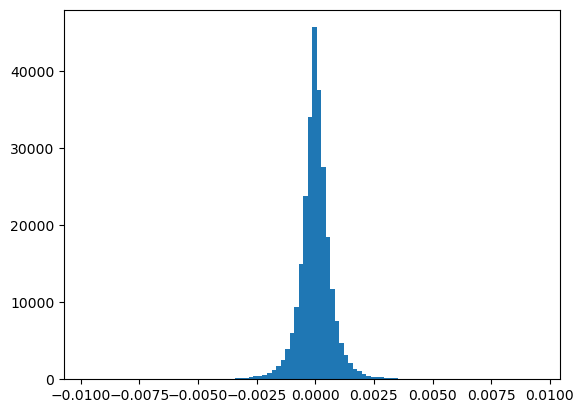

In [60]:
# plot histgram for volatility
print(ohlcvs['volatility'].describe())
hist_target = 0.01

filtered = ohlcvs[(ohlcvs['volatility'] < hist_target) & (ohlcvs['volatility'] > -hist_target)]

plt.hist(filtered['volatility'], bins=100)
plt.show()

In [ ]:
# filter the data
# 必要に応じて設定を変更してください。
ohlcvs['flag'] = ohlcvs['volatility'] < DipsRatio

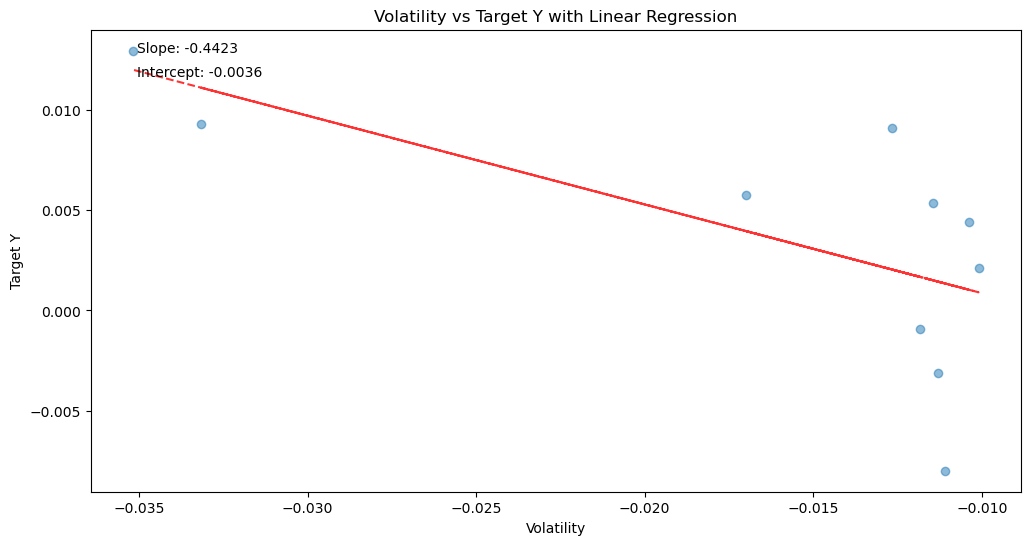

In [62]:
# plot scatter the data for volatility x target_y
filtered = ohlcvs[ohlcvs['flag']]

plt.figure(figsize=(12, 6))
plt.scatter(x='volatility', y='target_y', data=filtered, alpha=0.5)

# 線形回帰を追加
mask = ~(filtered['volatility'].isna() | filtered['target_y'].isna())
x = filtered.loc[mask, 'volatility']
y = filtered.loc[mask, 'target_y']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--", alpha=0.8)

# Add slope and intercept to the plot
plt.text(0.05, 0.95, f'Slope: {z[0]:.4f}', transform=plt.gca().transAxes)
plt.text(0.05, 0.90, f'Intercept: {z[1]:.4f}', transform=plt.gca().transAxes)

plt.xlabel('Volatility')
plt.ylabel('Target Y')
plt.title('Volatility vs Target Y with Linear Regression')
plt.show()